# Import des modules et du dataset

In [1]:
# import des librairies
import pandas as pd
import numpy as np

# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#import du dataset
df_Openfoodfacts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OC Projet3/fropenfoodfactsorgproducts.csv', encoding='utf-8', engine='python', sep ='\\t')

#1.   Nettoyage des données




## Visualisation et filtre en fonction du taux de remplissage

Dans cette première partie du notebook nous allons visualiser l'ensemble de données et faire un premier filtrage de notre dataset pour la suite de notre étude.

In [4]:
#visualisation de l'ensemble des données
df_Openfoodfacts.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_Openfoodfacts.shape

(320772, 162)

In [6]:
df_Openfoodfacts.isna().sum()

code                            0
url                             3
creator                        10
created_t                       0
created_datetime                1
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [7]:
df_Openfoodfacts.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [8]:
df_Openfoodfacts.describe()

,allergens_fr,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


On réalise un histograme afin de visualiser la proportion de données manquantes dans notre ensemble de données

In [9]:
df_Openfoodfacts.isna().sum()

code                            0
url                             3
creator                        10
created_t                       0
created_datetime                1
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

Text(0.5, 1.0, 'Pourcentagte de valeur manquantes')

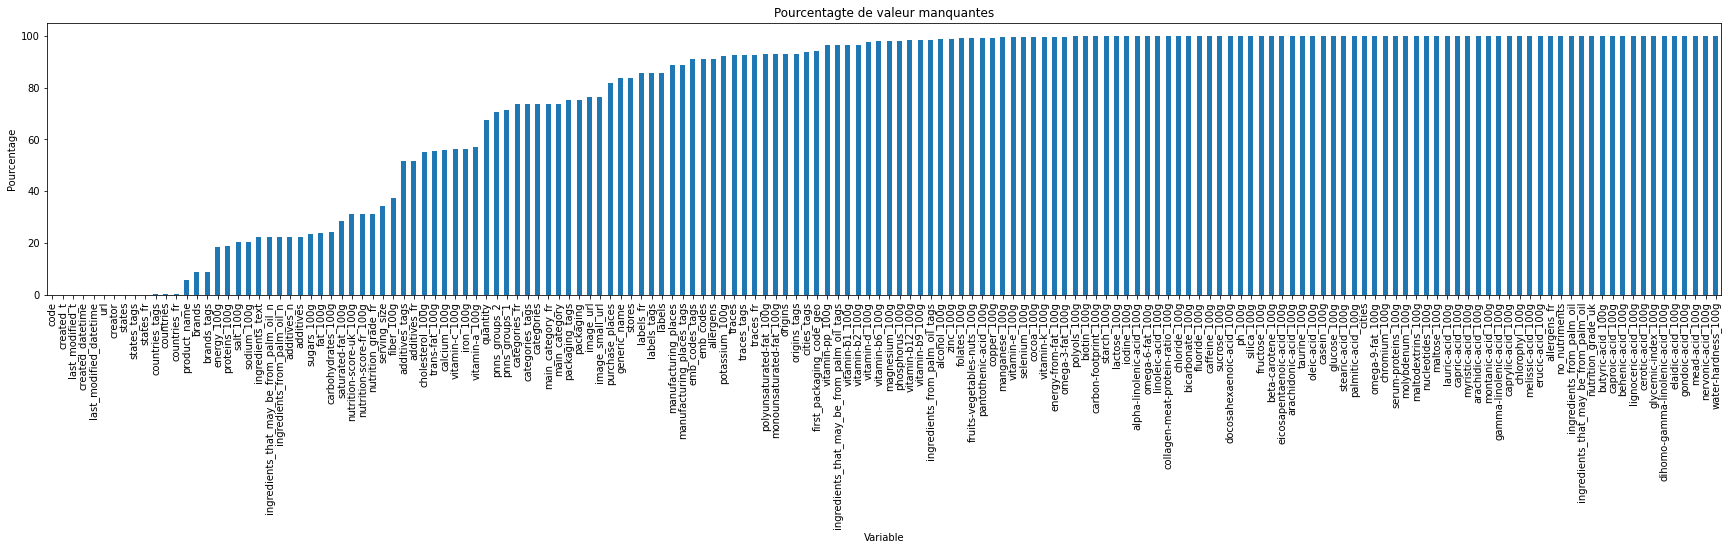

In [10]:
plt.figure(figsize = (30,5))
data = df_Openfoodfacts.isna().sum()*(100/320772)
data.sort_values().plot(kind='bar')
plt.ylabel('Pourcentage')
plt.xlabel('Variable')
plt.title("Pourcentagte de valeur manquantes")

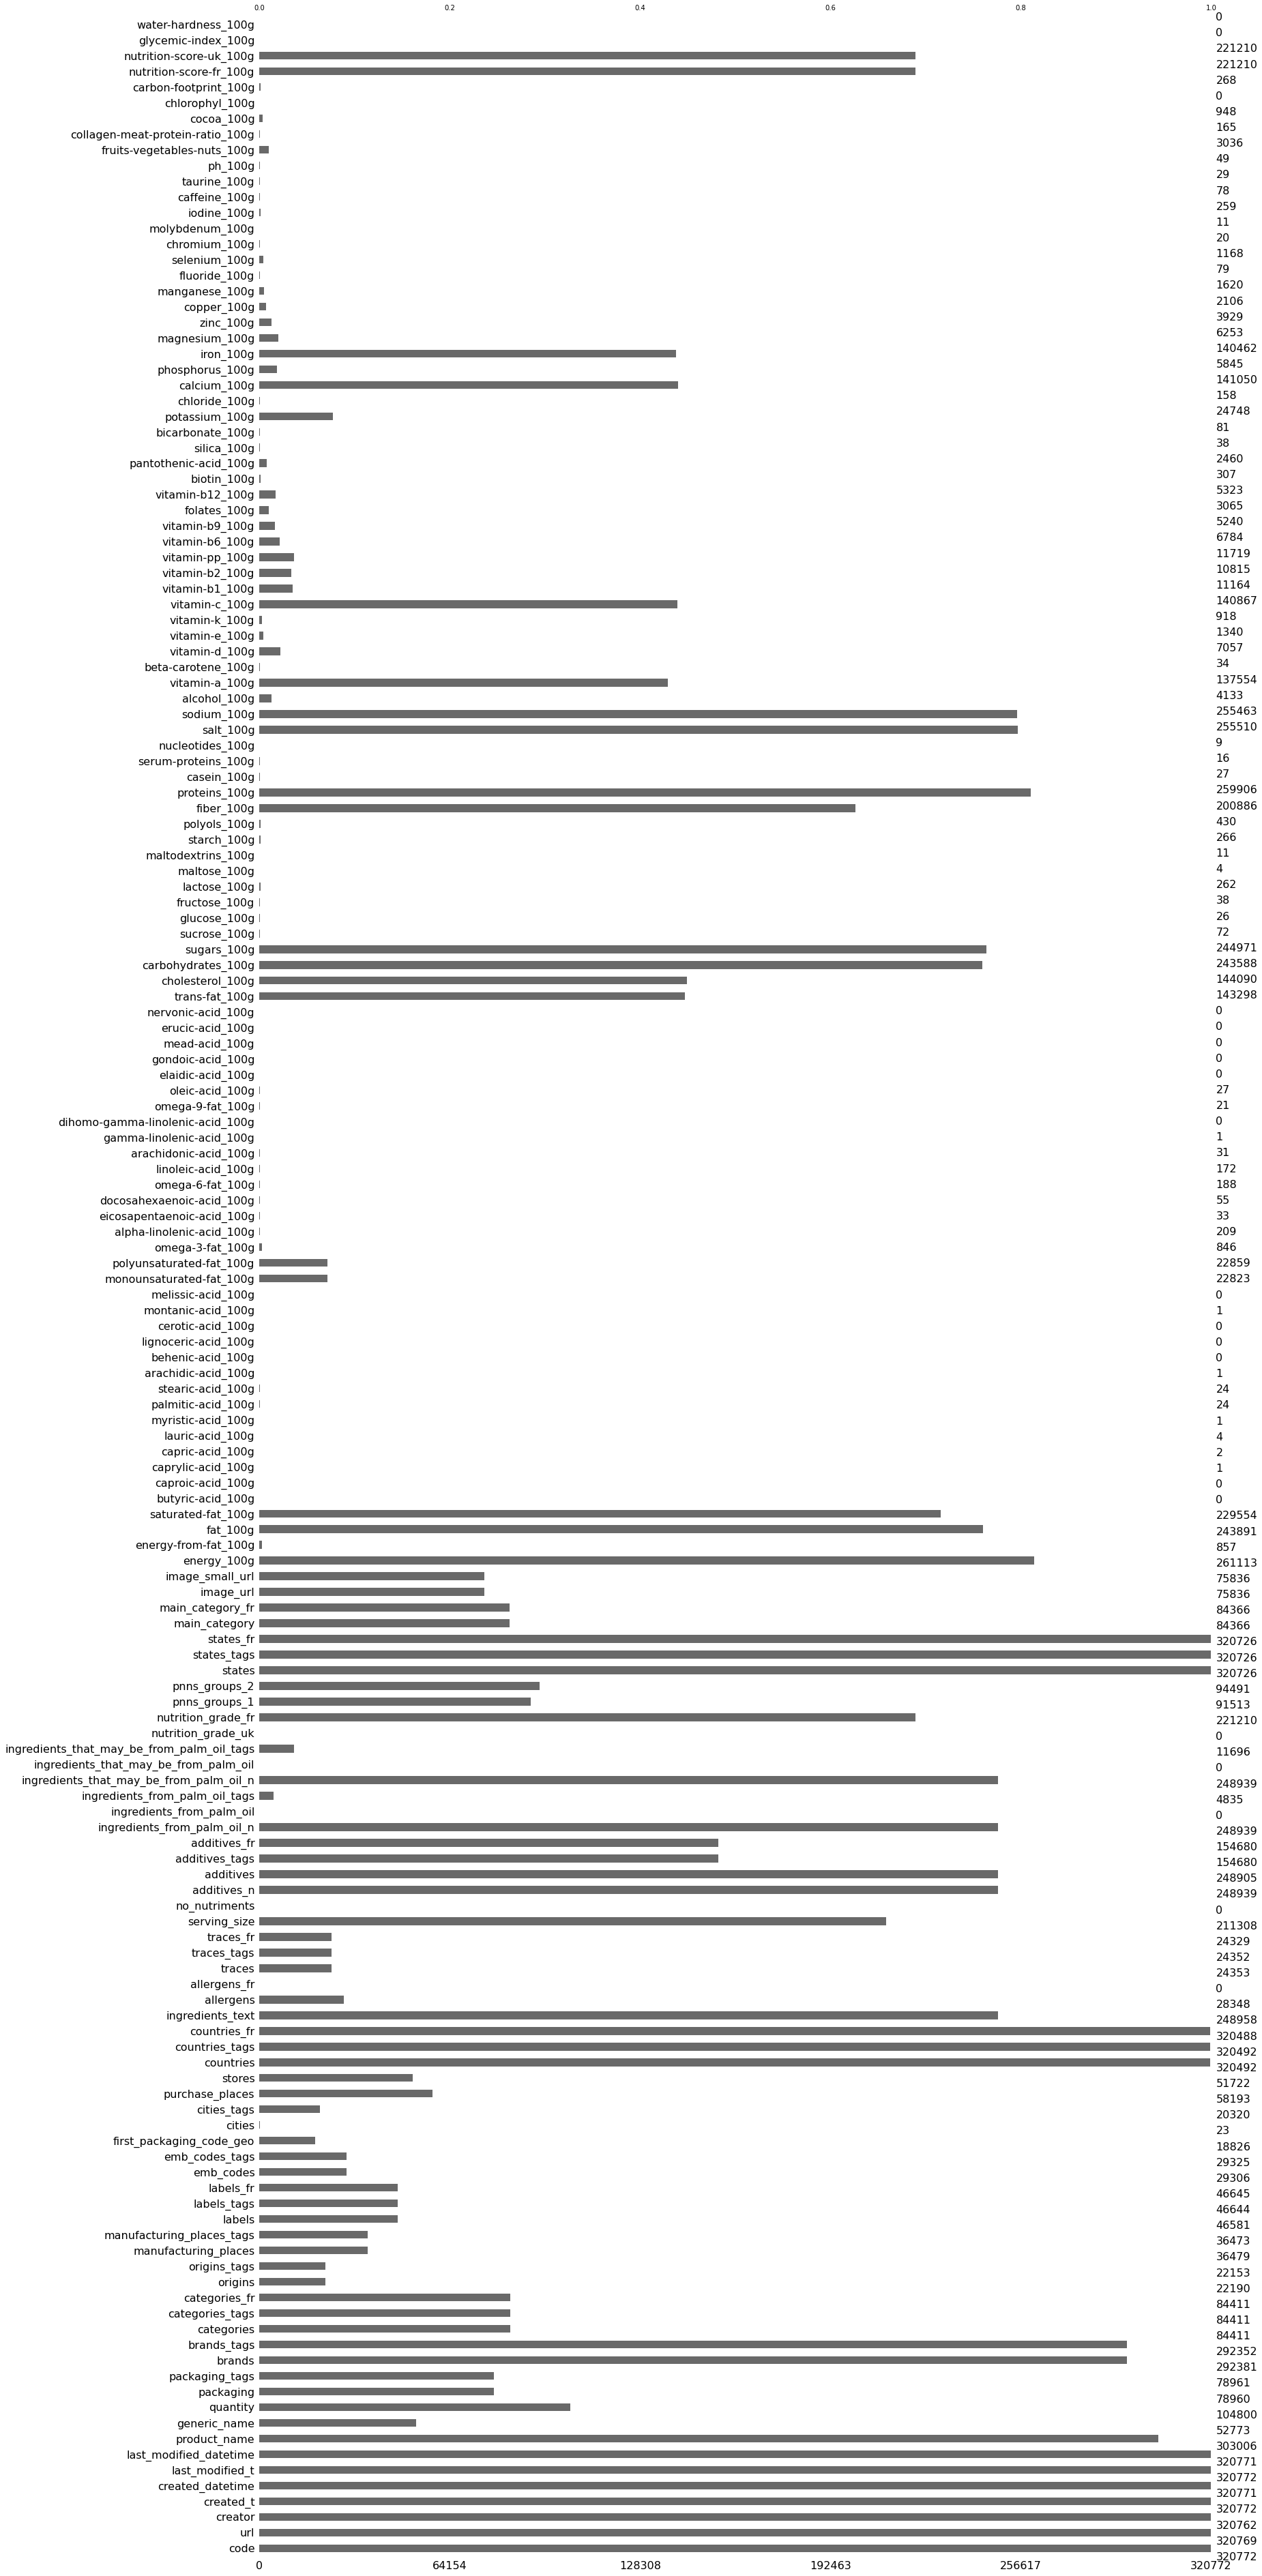

In [11]:
#Taux de remplissage de départ
msno.bar(df_Openfoodfacts)

Nous décidons de réduire notre jeu de données en ne conservant que les colonnes ayant au moins 100000 valeurs bien remplies.

In [12]:
#On commence par supprimer les colonnes n'ayant pas au moins de 30% de valeurs non nan. 
#C'est à dire on se fixe initialement un seuil de remplissage de 30% (soit 100000 valeurs non nan) des données sur les variables
df_OpenfoodfactsClean = df_Openfoodfacts.dropna(thresh = 100000 , axis =1)
#df_OpenfoodfactsClean = df_Openfoodfacts.dropna(how='all', axis =1)

In [13]:
(100000/320772)*100

31.17479081715362

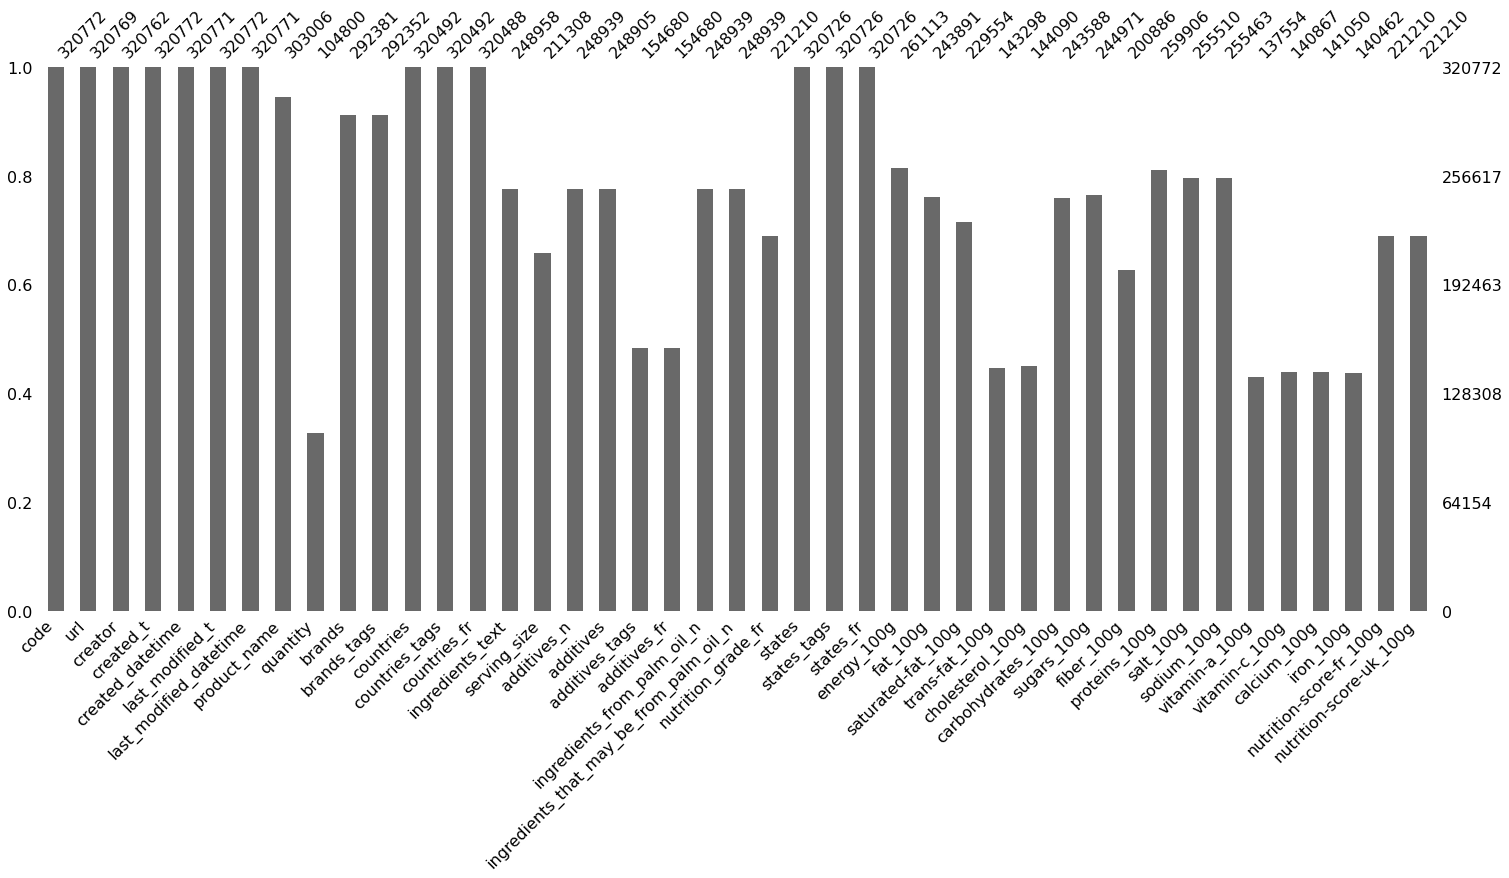

In [14]:
# Taux de remplissage après nettoyage
msno.bar(df_OpenfoodfactsClean)

Ensuite on observe la santé de notre nouveau jeu de données qui a reçu un premier filtrage.

In [15]:
df_OpenfoodfactsClean.shape

(320772, 43)

In [16]:
df_OpenfoodfactsClean.dtypes

code                                        object
url                                         object
creator                                     object
created_t                                   object
created_datetime                            object
last_modified_t                             object
last_modified_datetime                      object
product_name                                object
quantity                                    object
brands                                      object
brands_tags                                 object
countries                                   object
countries_tags                              object
countries_fr                                object
ingredients_text                            object
serving_size                                object
additives_n                                float64
additives                                   object
additives_tags                              object
additives_fr                   

In [17]:
df_OpenfoodfactsClean.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,Ferme t'y R'nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,Bob's Red Mill,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_OpenfoodfactsClean.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939.000000,248939.000000,248939.000000,2.611130e+05,243891.000000,229554.000000,143298.000000,144090.000000,243588.000000,244971.000000,200886.000000,259906.000000,255510.000000,255463.000000,137554.000000,140867.000000,141050.000000,140462.000000,221210.000000,221210.000000
mean,1.936024,0.019659,0.055246,1.141915e+03,12.730379,5.129932,0.073476,0.020071,32.073981,16.003484,2.862111,7.076366,2.028624,0.798815,0.000397,0.023367,0.125163,0.003652,9.165535,9.058049
std,2.502019,0.140524,0.269207,6.447154e+03,17.578747,8.014238,1.540223,0.358062,29.731719,22.327284,12.867578,8.409137,128.269454,50.504428,0.073278,2.236451,3.318263,0.214408,9.055903,9.183589
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,3.770000e+02,0.000000,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.100000e+03,5.000000,1.790000,0.000000,0.000000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,0.000000,0.000000,0.035000,0.001010,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1.674000e+03,20.000000,7.140000,0.000000,0.020000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,0.000107,0.003700,0.106000,0.002400,16.000000,16.000000
max,31.000000,2.000000,6.000000,3.251373e+06,714.290000,550.000000,369.000000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


## **Application:** Consommer des produits sains et très peu transformé (FreshFood)

Le but de cette application est d'améliorer l'alimentation des utilisateurs en leur proposant en fonction des aliments qu'ils recherchent, des produits le moins industrialisées possible et surtout qui ont une bonne valeur nutritive. 


 1- L'utilisateur aura à renseigner le type de "PRODUIT" qu'il recherche.

 2-  Ainsi, l'application lui proposera 1 ou 3 choix de produit de marque différent.

  Ces produits proposées par l'utilisateur auront les critères suivant:

  - Sont des produits saints et le moins industrialisés ( moins d'addictif, et ayant une bonnes valeur nutritives c'est à dire un bon ration de nutriments à favorisés etune faible quantité de nutriments à réduire)

  - Sont les produits demandés par l'utilisateur

  - Ont un très bon nutriscore


**Suppression des collonnes inutiles pour notre application**

Ici nous réalisons un deuxième filtrage de nos jeu de donnés en supprimant les collonnes qui ne rentre pas en compte dans le fonctionnement de notre application

In [19]:
df_OpenfoodfactsClean = df_OpenfoodfactsClean.drop(['created_t',
                                                    'last_modified_t',
                                                    'ingredients_from_palm_oil_n',
                                                    'ingredients_that_may_be_from_palm_oil_n',
                                                    'fat_100g',
                                                    'saturated-fat_100g',
                                                    'trans-fat_100g',
                                                    'cholesterol_100g',
                                                    'carbohydrates_100g',
                                                    'sodium_100g',
                                                    'vitamin-a_100g',
                                                    'vitamin-c_100g',
                                                    'calcium_100g',
                                                    'iron_100g',
                                                    'countries_fr',
                                                    'nutrition-score-uk_100g',
                                                    'countries_tags',
                                                    'quantity',
                                                    'countries',
                                                    'states_fr',
                                                    'states', 
                                                    'states_tags'], axis = 1)
df_OpenfoodfactsClean['categories'] = df_Openfoodfacts['categories_fr']

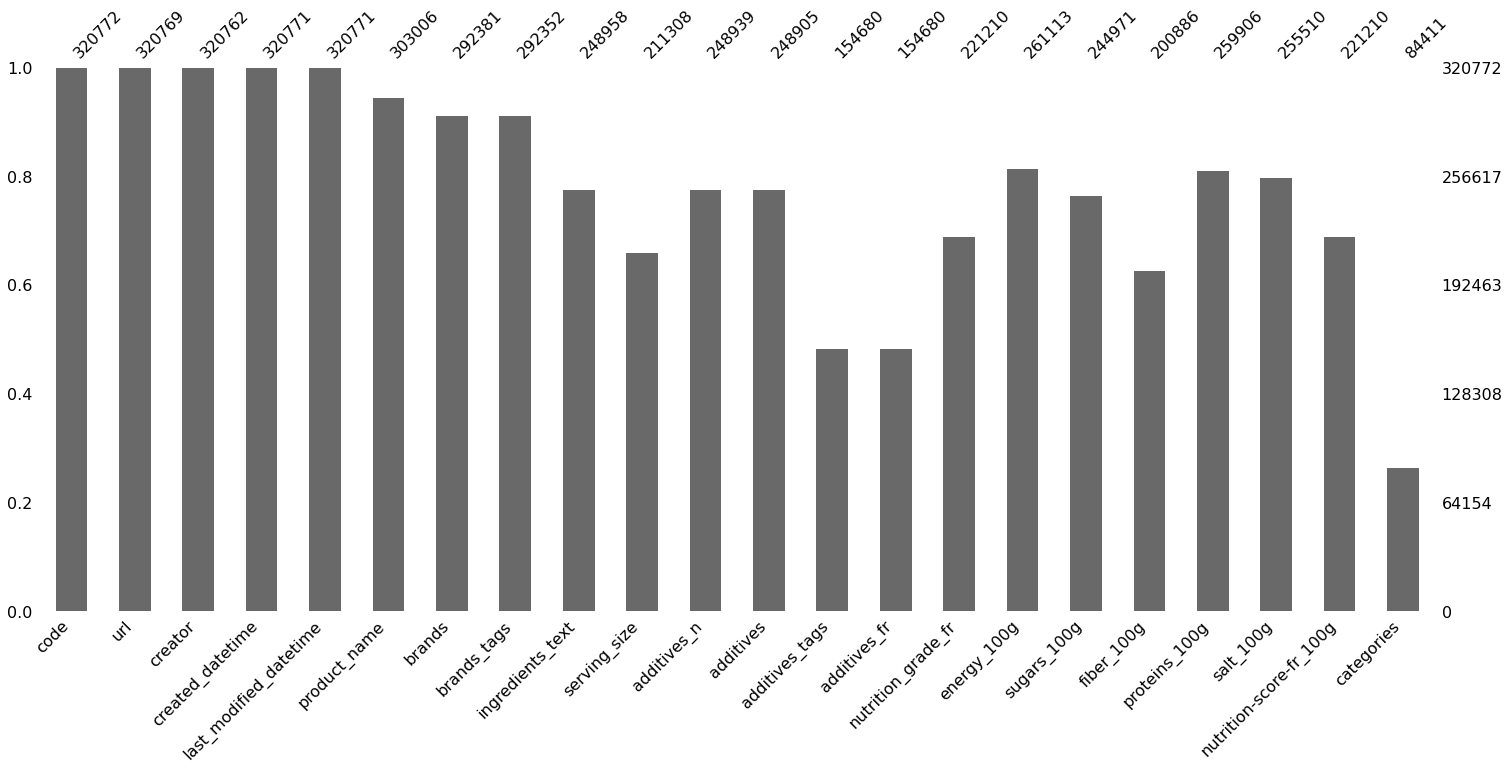

In [20]:
#Taux de remplissage du data set final
msno.bar(df_OpenfoodfactsClean)

In [21]:
df_OpenfoodfactsClean.shape

(320772, 22)

## Traitement des valeurs manquantes

A partir de ce moment on peut s'occuper des valeurs manquantes de notre jeu de données car il résument éssentiellement les données utiles pour notre application.

Pour ce faire, nous allons d'abord visualiser la proportion des données manquantes de notre dataset et ensuite faire des choix sur le remplissage

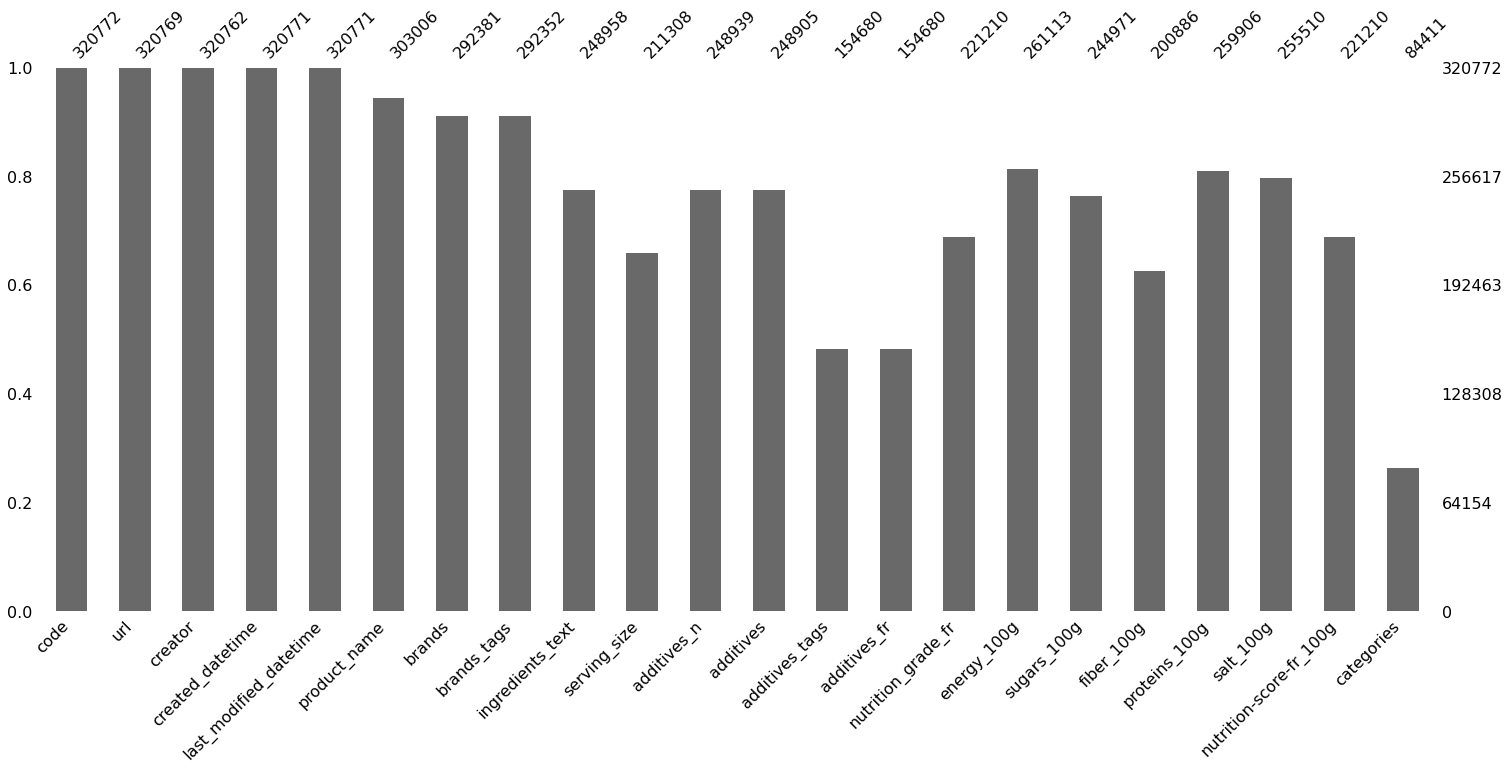

In [22]:
#Taux de remplissage
msno.bar(df_OpenfoodfactsClean)

In [23]:
df_OpenfoodfactsClean.isna().sum()

code                            0
url                             3
creator                        10
created_datetime                1
last_modified_datetime          1
product_name                17766
brands                      28391
brands_tags                 28420
ingredients_text            71814
serving_size               109464
additives_n                 71833
additives                   71867
additives_tags             166092
additives_fr               166092
nutrition_grade_fr          99562
energy_100g                 59659
sugars_100g                 75801
fiber_100g                 119886
proteins_100g               60866
salt_100g                   65262
nutrition-score-fr_100g     99562
categories                 236361
dtype: int64

Nous rempplissons nos données manquantes

In [24]:
#Il n'est pas primordial d'avoir une url dans notre dataframe donc ont peut remplacer ces url par une url au hasard: 'www.google.fr'
df_OpenfoodfactsClean['url'] = df_OpenfoodfactsClean['url'].fillna('www.google.fr')

#Traitement de la colonne creator
# **** Nous supprimerons aussi la colonnes 'creator' car elle n'apporte pas de valeur sur notre application ****
df_OpenfoodfactsClean = df_OpenfoodfactsClean.drop(['creator'], axis =1)

#Traitement de la colonne 'created_datetime' & 'last_modified_datetime'
df_OpenfoodfactsClean[df_OpenfoodfactsClean['created_datetime'].isna()]
#On le remplit avec la valeur de la ligne précédent car ceux-ci n'on pas une grande incidence sue notre application
df_OpenfoodfactsClean['created_datetime'] = df_OpenfoodfactsClean['created_datetime'].fillna(method='backfill')
df_OpenfoodfactsClean['last_modified_datetime'] = df_OpenfoodfactsClean['last_modified_datetime'].fillna(method='backfill')

#Traitemant de la colonnes 'product_name'

# ici nous allons supprimer les produits qui n'ont pas de nom
# Car un produit sans nom ne peut être proposézs à l'utilisateur. 
# Ce choix a été fait pour les raison suivantes: 
#  **** Le nom est une référence inportante dans notre application                                 ****
#  **** Etant données la faible quantité de nom manquantes ont peu se permettre de les supprimer   ****
#  **** Si on choisi de les remplacer par des valeurs proche on risque de se retrouver avec des produits abbérents ****

productname_na = df_OpenfoodfactsClean[df_OpenfoodfactsClean['product_name'].isna()]
df_OpenfoodfactsClean = df_OpenfoodfactsClean.drop(index=productname_na.index)

# Traitement des valeurs manquantes "brands" et "brands_tags"
df_OpenfoodfactsClean['brands'] = df_OpenfoodfactsClean['brands'].fillna('Marque inconnu')
df_OpenfoodfactsClean = df_OpenfoodfactsClean.drop(['brands_tags'], axis =1)

# Traitement des valeurs manquantes "ingredients_text"
#Le textes des ingrédients n'étant pas rtenseignés on remplace cala par 'non renseigné" et elles n'influence pas notre études
df_OpenfoodfactsClean['ingredients_text'] = df_OpenfoodfactsClean['ingredients_text'].fillna('Non renseigné')

#Traitement serving_size
#On utilisera généralempent pas cette information
df_OpenfoodfactsClean = df_OpenfoodfactsClean.drop(['serving_size'], axis =1)

#Traitement addictives tags et fr
#On les supprimes car il exite une colonnes 'additives' qui résument ces données
df_OpenfoodfactsClean = df_OpenfoodfactsClean.drop(['additives_tags', 'additives_fr'], axis =1)

#Traitement "addictives_n"
#On remplace les inconnus par la moyennes
addictive_median = df_OpenfoodfactsClean['additives_n'].median()
df_OpenfoodfactsClean['additives_n'] = df_OpenfoodfactsClean['additives_n'].fillna(value = addictive_median)

#Traitement "additives"
#ON remplace les inconnus par "Addictives inconnu"
df_OpenfoodfactsClean['additives'] = df_OpenfoodfactsClean['additives'].fillna(value = "Addictives inconnu")

#Traitment du "nitrition_grade_fr" et du "nutrition-score-fr_100g"
#On, supprime les produit n'ayant pas de nutrition-score-fr car cette collones est éssentiel à notre analyse
#Si ce sont les même n'ayant pas de nutrition_grade_fr elle seront automatiqument supprimmer
index_nan_nutrition = df_OpenfoodfactsClean.index[df_OpenfoodfactsClean['nutrition-score-fr_100g'].isna()]
df_OpenfoodfactsClean.drop(index_nan_nutrition,0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [25]:
df_OpenfoodfactsClean.groupby('categories')['categories'].count().sort_values()

categories
Aceitunas,Aceitunas-deshuesadas,Aceitunas-verdes,Aceitunas-verdes-deshuesadas,Encurtidos,Hortalizas,Vegetales-encurtidos                                                                                 1
Frais,Produits laitiers,Desserts,Yaourts,Yaourts aux fruits,Yaourts sucrés,Yaourts entiers,Yaourts-sur-lit,Yaourts-sur-lit-de-mures                                                                      1
Snacks sucrés,Confiseries,Chocolats,Chocolats noirs,Chocolats fourrés au praliné                                                                                                                         1
Frais,Produits laitiers,Desserts,Yaourts,Yaourts aux fruits,Yaourts sucrés,Yaourts multifruits,Yaourts sur lit de fruits,Yaourts-sur-lit                                                                 1
Frais,Produits laitiers,Desserts,Yaourts,Yaourts aux fruits,Yaourts à l'abricot,Yaourts brassés aux fruits,Yaourts allégés en matière grasse,Yaourts brassés,Yaourts sucrés,Yaour

In [26]:
#Netoyage pour la variable catégories.
# Nous alons sélectionner les premières information sur l'individu. celle séparer par la virgule car elle contient assez d'information suffisantes.
# Sur cette base on élimine les nombre totales de catégories unbique qui était due au traduction des données dans des  langue différnetes et au synonymes des catégories données.
dt_split = df_OpenfoodfactsClean['categories'].str.split(pat =',', n= 1, expand = True)
df_OpenfoodfactsClean['categories'] = dt_split[0]

In [27]:
df_OpenfoodfactsClean.groupby('categories')['categories'].count().sort_values()

categories
Aceitunas                                      1
en:Crackers-sans-gluten                        1
en:Crab-pate                                   1
en:Couscous                                    1
en:Cous-cous                                   1
                                           ...  
Frais                                       2843
Viandes                                     3078
Produits laitiers                           4906
Snacks sucrés                               8537
Aliments et boissons à base de végétaux    18416
Name: categories, Length: 1888, dtype: int64

In [28]:
# On remplace les valeurs Nan des categorie par Non catégorisé pour signifier que ces produits n'ont pas de catégories définis dans notre base
df_OpenfoodfactsClean['categories'] = df_OpenfoodfactsClean['categories'].fillna(value = "Catégorie générale")

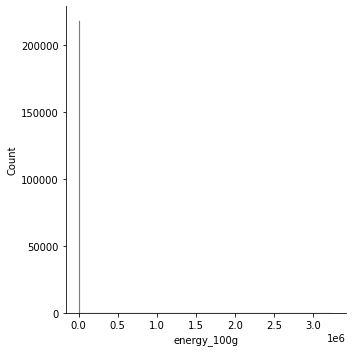

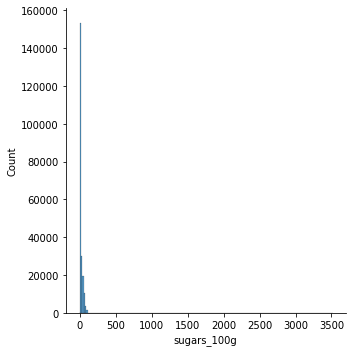

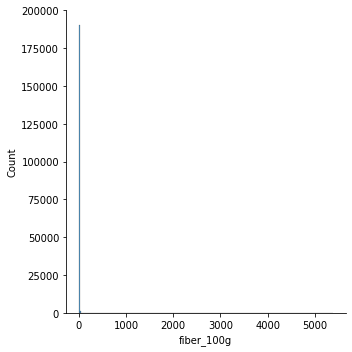

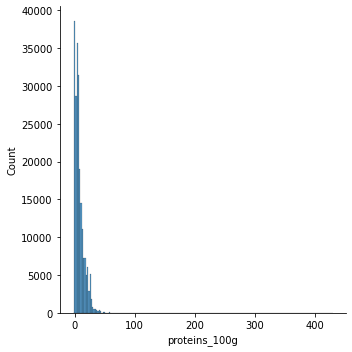

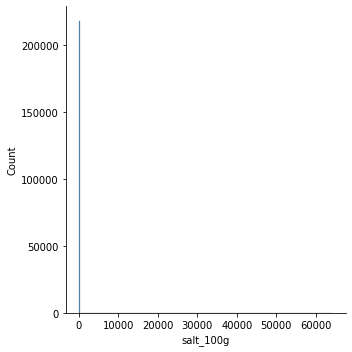

In [29]:
#Nous alons observer nos distributions sur les différentes variable afin de choisir notre valeur de remplissage 
fig2 = sns.displot(df_OpenfoodfactsClean, x= 'energy_100g' , bins = 300)
plt.show()

fig3 = sns.displot(df_OpenfoodfactsClean, x= 'sugars_100g', bins = 200)
plt.show()

fig6 = sns.displot(df_OpenfoodfactsClean, x= 'fiber_100g' , bins = 200)
plt.show()

fig5 = sns.displot(df_OpenfoodfactsClean, x= 'proteins_100g' , bins = 200)
plt.show()

fig6 = sns.displot(df_OpenfoodfactsClean, x= 'salt_100g' , bins = 200)
plt.show()

In [30]:
#On remplace les données Nan par les moyennes des données de leur catégories
df_OpenfoodfactsClean['energy_100g'] = df_OpenfoodfactsClean.groupby('categories')['energy_100g'].transform(lambda x: x.fillna(x.mean()))
df_OpenfoodfactsClean['sugars_100g'] = df_OpenfoodfactsClean.groupby('categories')['sugars_100g'].transform(lambda x: x.fillna(x.mean()))
df_OpenfoodfactsClean['fiber_100g'] = df_OpenfoodfactsClean.groupby('categories')['fiber_100g'].transform(lambda x: x.fillna(x.mean()))
df_OpenfoodfactsClean['proteins_100g'] = df_OpenfoodfactsClean.groupby('categories')['proteins_100g'].transform(lambda x: x.fillna(x.mean()))
df_OpenfoodfactsClean['salt_100g'] = df_OpenfoodfactsClean.groupby('categories')['salt_100g'].transform(lambda x: x.fillna(x.mean()))

In [31]:
df_OpenfoodfactsClean.isna().sum()

code                         0
url                          0
created_datetime             0
last_modified_datetime       0
product_name                 0
brands                       0
ingredients_text             0
additives_n                  0
additives                    0
nutrition_grade_fr           0
energy_100g                 16
sugars_100g                 16
fiber_100g                 629
proteins_100g               16
salt_100g                   16
nutrition-score-fr_100g      0
categories                   0
dtype: int64

In [32]:
df_OpenfoodfactsClean[df_OpenfoodfactsClean['sugars_100g'].isna()]

,code,url,created_datetime,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,energy_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,categories
14621,0018894306436,http://world-fr.openfoodfacts.org/produit/0018...,2015-07-18T02:59:28Z,2017-03-10T08:11:48Z,grated parmesan cheese,Big Y,Parmesan cheese (cultured pasteurized part-ski...,2.0,[ parmesan-cheese -> en:parmesan-cheese ] [...,b,NaN,NaN,NaN,NaN,NaN,0.0,en:Grated-parmesan-cheese
59590,0048500201039,http://world-fr.openfoodfacts.org/produit/0048...,2015-09-05T04:56:00Z,2015-09-05T18:38:30Z,Tropicana farmstand tropical green fruit and v...,Tropicana,"Reconstituted clarified sweet potato juice, gr...",2.0,[ reconstituted-clarified-sweet-potato-juice ...,b,NaN,NaN,NaN,NaN,NaN,0.0,en:Juice
77509,0071828003009,http://world-fr.openfoodfacts.org/produit/0071...,2015-07-17T23:34:49Z,2017-03-09T12:21:07Z,Extra Hot Wasabi Horseradish,Beaver,"Grated horseradish and wasabi roots, water, wh...",7.0,[ grated-horseradish-and-wasabi-roots -> en:g...,b,NaN,NaN,NaN,NaN,NaN,0.0,en:Wasabi-horseradish
104812,0085981311451,http://world-fr.openfoodfacts.org/produit/0085...,2016-11-30T21:58:08Z,2016-11-30T22:13:37Z,Cacao Rodelle,Rodelle,100 % cacao transformé par alcalis,0.0,[ 100-cacao-transforme-par-alcalis -> fr:100-...,b,NaN,NaN,NaN,NaN,NaN,0.0,Poudre-de-feves-de-cacao
176567,2000000041549,http://world-fr.openfoodfacts.org/produit/2000...,2017-01-26T20:41:15Z,2017-03-08T16:57:04Z,Feed. Reasy-to-use,Feed.,"Farine d'avoine,huile( huile de colza, maltode...",10.0,[ farine-d-avoine -> fr:farine-d-avoine ] [...,b,NaN,NaN,NaN,NaN,NaN,0.0,Substitution-de-repas
223659,3292590878184,http://world-fr.openfoodfacts.org/produit/3292...,2015-08-10T11:18:57Z,2017-03-08T09:17:44Z,aiguillettes de poulet et pennes complètes aus...,thiriet,pates penne complèts cuites 27.1 % ( eau semou...,2.0,[ pates-penne-complets-cuites-27-1 -> fr:pate...,b,NaN,NaN,NaN,NaN,NaN,0.0,Plat-prepare-pour-1-pers
262546,4062300087668,http://world-fr.openfoodfacts.org/produit/4062...,2016-02-26T11:17:41Z,2016-02-26T11:42:24Z,Les Menus Plaisirs,Hipp,"Légumes* 33% (tomates* 15%, carottes* 12%, po...",0.0,[ legumes-33 -> fr:legumes-33 ] [ legumes -...,b,NaN,NaN,NaN,NaN,NaN,0.0,Plat-complet-adapte-a-l-enfant
268850,4902663010197,http://world-fr.openfoodfacts.org/produit/4902...,2015-04-19T12:22:12Z,2017-03-16T20:29:18Z,SOUPE MISO TOFU,Hiraki Miso,"PÂTE MISO PREPAREE: [pâte MISO 73,2% (eau,_soj...",4.0,[ pate-miso-preparee -> fr:pate-miso-preparee...,b,NaN,NaN,NaN,NaN,NaN,0.0,Soupe-japonaise
274020,5054070548189,http://world-fr.openfoodfacts.org/produit/5054...,2017-01-11T23:47:46Z,2017-01-12T00:22:44Z,Teenagers' Multivitamins & Minerals,ASDA,"Calcium Carbonate, Cellulose, Ascorbic Acid, M...",17.0,[ calcium-carbonate -> en:e170 -> exists --...,b,NaN,NaN,NaN,NaN,NaN,0.0,en:Vitamins
284370,6922130119381,http://world-fr.openfoodfacts.org/produit/6922...,2015-03-03T20:26:23Z,2015-03-17T18:02:17Z,Granulated Chicken Flavour Bouillon,Totole,"Exhausteur de goût (E621, E635, E101(i)), sel,...",3.0,[ exhausteur-de-gout -> fr:exhausteur-de-gout...,b,NaN,NaN,NaN,NaN,NaN,0.0,Poudres


In [33]:
df_OpenfoodfactsClean[df_OpenfoodfactsClean['fiber_100g'].isna()]

,code,url,created_datetime,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,energy_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,categories
10837,0013409516027,http://world-fr.openfoodfacts.org/produit/0013...,2015-02-23T11:45:53Z,2015-03-01T04:20:31Z,Sweet Baby Rays Steakhouse Marinade & Sauce,Sweet Baby Rays,"High Fructose Corn Syrup, Distilled Vinegar, T...",1.0,[ high-fructose-corn-syrup -> en:high-fructos...,e,832.0,41.0,NaN,1.8,2.83972,21.0,en:Barbeque-sauce
14621,0018894306436,http://world-fr.openfoodfacts.org/produit/0018...,2015-07-18T02:59:28Z,2017-03-10T08:11:48Z,grated parmesan cheese,Big Y,Parmesan cheese (cultured pasteurized part-ski...,2.0,[ parmesan-cheese -> en:parmesan-cheese ] [...,b,NaN,NaN,NaN,NaN,NaN,0.0,en:Grated-parmesan-cheese
35663,0038900013400,http://world-fr.openfoodfacts.org/produit/0038...,2015-03-28T08:44:49Z,2015-10-19T07:15:28Z,Pineapple slices in juice,Dole,"P|NEAPPLE (69%), PINEAPPLE JUICE (31%)",0.0,[ p-neapple -> en:p-neapple ] [ neapple -> ...,b,231.0,12.0,NaN,0.1,0.01270,2.0,en:Pineapple-slices-in-juice
57325,0044738018371,http://world-fr.openfoodfacts.org/produit/0044...,2015-02-27T04:23:34Z,2016-07-22T00:23:12Z,TCC Premium Coconut Milk,TCC,"Coconut Extract (53%), Water, Antioxidant (Cit...",1.0,[ coconut-extract -> en:coconut-extract ] [...,d,757.0,1.0,NaN,2.0,0.03810,12.0,en:Canned-coconut-milk
59574,0048500008386,http://world-fr.openfoodfacts.org/produit/0048...,2015-02-06T19:09:27Z,2015-02-06T19:47:09Z,Tropicana Cranberry,Tropicana,"Filtered water, high fructose corn syrup, cran...",1.0,[ filtered-water -> en:filtered-water ] [ w...,b,237.0,12.3,NaN,0.0,0.02540,2.0,en:Juice-beverage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320342,9400550602487,http://world-fr.openfoodfacts.org/produit/9400...,2015-03-14T11:59:35Z,2016-10-19T19:16:41Z,Brunch Mixed Berry Bar,Cadbury,"_Oats_, invert sugar, sugar, rice crisps (rice...",8.0,[ oats -> en:oats ] [ invert-sugar -> en:in...,e,1810.0,34.8,NaN,4.5,0.48006,22.0,en:Chocolate-covered-muesli-bar
320375,9414897011642,http://world-fr.openfoodfacts.org/produit/9414...,2015-03-02T11:34:28Z,2015-03-02T12:35:01Z,Creme de la Creme Hokey Pokey Ice Cream,Talley's,"_Milk_ solids, cream, sugar, glucose, confecti...",7.0,[ milk-solids -> en:milk-solids ] [ solids ...,d,883.0,21.9,NaN,3.1,0.11430,13.0,en:Hokey-pokey-ice-cream-tubs
320382,9414972100391,http://world-fr.openfoodfacts.org/produit/9414...,2015-03-02T12:44:42Z,2015-08-12T18:26:06Z,Instant Dry Yeast,"Edmonds,Edmonds Sure To Rise","Natural yeast (saccharomyces cerevisiae), emul...",1.0,[ natural-yeast -> en:natural-yeast ] [ yea...,b,1560.0,17.7,NaN,46.0,0.16510,2.0,en:Instant-dry-yeast
320392,9415077412907,http://world-fr.openfoodfacts.org/produit/9415...,2015-03-02T11:46:32Z,2015-03-02T11:52:32Z,Dark Compound Chocolate Drops,Pams,"Sugar, vegetable fat (palm kernel oil), cocoa ...",3.0,[ sugar -> en:sugar ] [ vegetable-fat -> en...,e,2230.0,58.8,NaN,3.3,0.29210,27.0,en:Chocolate-drops


In [34]:
#On remplacera les valeurs des variables numérique non remplie par 0.
# Car les individus restants ayant des valeur Nan pour les variables: energy_100g ,  sugars_100g , proteins_100g et salt_100g ont des nutriscore nulles et peuvent être considéré comme initéressant
#Ceux sont les même individus qui ont ces variable Nan
nutriment_na = df_OpenfoodfactsClean[df_OpenfoodfactsClean['energy_100g'].isna()]
df_OpenfoodfactsClean = df_OpenfoodfactsClean.drop(index=nutriment_na.index)

#On remplacera les valeurs des variables fibres non remplie par 0.
#ON suppose ici que si c'est la seule données non remplie on peut le considérer comme nulles car elle n'a pas ce nutriments.
df_OpenfoodfactsClean['fiber_100g'] = df_OpenfoodfactsClean['fiber_100g'].fillna(value = 0)

In [35]:
df_OpenfoodfactsClean.isna().sum()

code                       0
url                        0
created_datetime           0
last_modified_datetime     0
product_name               0
brands                     0
ingredients_text           0
additives_n                0
additives                  0
nutrition_grade_fr         0
energy_100g                0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
nutrition-score-fr_100g    0
categories                 0
dtype: int64

## Traitement des autres types d'erreurs

In [36]:
df_OpenfoodfactsClean.dtypes

code                        object
url                         object
created_datetime            object
last_modified_datetime      object
product_name                object
brands                      object
ingredients_text            object
additives_n                float64
additives                   object
nutrition_grade_fr          object
energy_100g                float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
nutrition-score-fr_100g    float64
categories                  object
dtype: object

ICi on convertira les addictives en entier  et on surpprimeras les valeurs double

In [37]:
# Convertir les 'addictives_n' en entier pour facilité nos calcul pour la suite
df_OpenfoodfactsClean['additives_n'] = df_OpenfoodfactsClean['additives_n'].astype('int')

#Supprimmer les doublons
# Les doublons seront les lignes avec les même code car les codes sont des identifiants unique pour chaque produit
#df_OpenfoodfactsClean = df_OpenfoodfactsClean.drop_duplicates(subset = ['code'], keep = 'first')

NOus allons vérifier si il y a des données dupliqués Dans notre dataset.

- Pour cela on verifiera dans un premier temps si il y a des individu qui ont la meme valeur pour toutes les variables
- Ensuite on vérifiera si il existe des individu avec le même code. Même cela si ne doit pas être le cas car le 'code' est un identifiant unique des variables
- Ensuite on vérifiera si il existe des individus ayant les même  valeur pour le groupe de variable primordiale à notre étude: "product_name", "brands", "additives_n" , "energy_100g", "sugars_100g", "fiber_100g" , "proteins_100g", "salt_100g ", "nutrition-score-fr_100g" . SI cela est le cas nous allons devoir supprimer ces duplications car elle risque de faussé nos résultats

In [38]:
df_OpenfoodfactsClean.duplicated().sum()

0

In [39]:
df_OpenfoodfactsClean.duplicated(subset = ['code']).sum()

0

On constat que le code est unique comme on le souhaitais

In [40]:
#Vérification des duplications
df_OpenfoodfactsClean.duplicated(subset = ["product_name", "brands", "additives_n" , "energy_100g", "sugars_100g", "fiber_100g" , "proteins_100g", "salt_100g", "nutrition-score-fr_100g"]).sum()

4874

In [41]:
#ON supprime donc ces duplications
df_OpenfoodfactsClean = df_OpenfoodfactsClean.drop_duplicates(subset = ["product_name",
                                                                        "brands",
                                                                        "additives_n" ,
                                                                        "energy_100g",
                                                                        "sugars_100g",
                                                                        "fiber_100g" ,
                                                                        "proteins_100g",
                                                                        "salt_100g",
                                                                        "nutrition-score-fr_100g"], keep = "first")

## Traitement des valeurs abérrantes et atypique

In [42]:
df_OpenfoodfactsClean.describe()

,additives_n,energy_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,213573.000000,2.135730e+05,213573.000000,213573.000000,213573.000000,213573.000000,213573.000000
mean,1.882967,1.195795e+03,14.987301,2.753001,7.771910,1.660154,9.158349
std,2.411849,7.107161e+03,21.176189,12.384569,8.106944,139.788970,9.048871
min,0.000000,0.000000e+00,-17.860000,0.000000,-3.570000,0.000000,-15.000000
25%,0.000000,4.560000e+02,1.300000,0.000000,1.900000,0.100000,1.000000
50%,1.000000,1.191000e+03,5.000000,1.600000,5.700000,0.652780,10.000000
75%,3.000000,1.715000e+03,23.000000,3.600000,10.710000,1.361440,16.000000
max,31.000000,3.251373e+06,3520.000000,5380.000000,430.000000,64312.800000,40.000000


En observant le tabelau descriptif de notre ensemble de données on constate qu'il y ades valeurs négatif pour les éléments présents dans les aliments. ALors que si il ne peut y avoir une proportion négatif de sucre par exemple. Au pire des cas il n'y en a pas du tout

In [43]:
df_OpenfoodfactsClean[df_OpenfoodfactsClean['proteins_100g'] < 0]

,code,url,created_datetime,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,energy_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,categories
33781,0036800416727,http://world-fr.openfoodfacts.org/produit/0036...,2017-03-09T10:39:38Z,2017-03-09T10:39:38Z,Whole Cashews,Food Club,"Cashews, vegetable oil (peanut, cottonseed, so...",0,[ cashews -> en:cashews ] [ vegetable-oil -...,d,2389.0,3.57,3.6,-3.57,0.99822,14.0,Catégorie générale


In [44]:
df_OpenfoodfactsClean[df_OpenfoodfactsClean['sugars_100g'] < 0 ]

,code,url,created_datetime,last_modified_datetime,product_name,brands,ingredients_text,additives_n,additives,nutrition_grade_fr,energy_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,categories
8582,0011213420608,http://world-fr.openfoodfacts.org/produit/0011...,2017-03-09T13:41:49Z,2017-03-09T13:41:49Z,Grade A Fancy Chopped Spinach,Spartan,Spinach.,0,[ spinach -> en:spinach ],a,151.0,-1.20,1.200000,2.41,0.38354,-1.0,Catégorie générale
18209,0021130493432,http://world-fr.openfoodfacts.org/produit/0021...,2017-03-09T13:30:13Z,2017-03-09T13:30:13Z,"Select, Spicy Red Bell Pepper Pasta Sauce",Signature,"Tomatoes (diced tomatoes and tomato paste), wa...",0,[ tomatoes -> en:tomatoes ] [ diced-tomatoe...,b,167.0,-0.80,0.800000,0.80,0.87376,2.0,Catégorie générale
117739,0608866999263,http://world-fr.openfoodfacts.org/produit/0608...,2017-03-09T10:55:13Z,2017-03-09T10:55:13Z,"Hummous, Black Truffle",The Wild Pea,"Chickpeas (garbanzo beans, water, salt), fresh...",1,[ chickpeas -> en:chickpeas ] [ garbanzo-be...,a,598.0,-3.57,3.600000,7.14,0.95250,-4.0,Catégorie générale
150858,0813922021028,http://world-fr.openfoodfacts.org/produit/0813...,2017-03-09T13:28:53Z,2017-03-09T13:28:53Z,"Italianavera, Tomato Sauce With Gaeta Olives &...",Italiana Vera Srl,"Diced tomato (83%), gaeta pitted black olives ...",0,[ diced-tomato -> en:diced-tomato ] [ tomat...,c,326.0,-6.25,1.200000,1.25,1.19380,4.0,Catégorie générale
164030,0856336001538,http://world-fr.openfoodfacts.org/produit/0856...,2017-03-09T10:47:08Z,2017-03-09T10:47:08Z,Organic Pumpkin Seeds,Cb's Nuts,"Fresh roasted organic pumpkin seeds, sea salt.",0,[ fresh-roasted-organic-pumpkin-seeds -> en:f...,a,255.0,-17.86,17.900000,17.86,1.93294,-2.0,Catégorie générale
195761,3161712000928,http://world-fr.openfoodfacts.org/produit/3161...,2015-04-07T21:36:52Z,2016-06-11T15:40:10Z,Caprice des dieux,Caprice des Dieux,"_Lait_ de vache, _crème_, sel, ferments lactiq...",0,[ lait-de-vache -> fr:lait-de-vache ] [ lai...,d,1379.0,-0.10,0.243603,15.30,1.40000,15.0,Produits laitiers


ON réalise des boxplot pour observer les écarts existants parmi les données. Pour autant nous les garderons ainsi car ces valeurs ne sont pas totalement absurdes. ET nos recherches nous ont permis de justifié qu'il peuvent exister une iinfirme quantité de produit avec des valeurs aussi grande pour des proportions en nutriments telles que les proteines, le sucres ect...

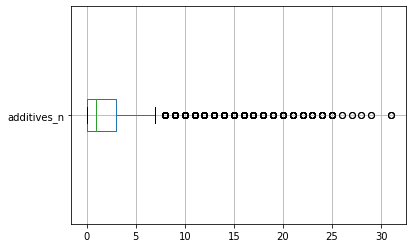

In [45]:
#Dectection des valeurs abérantes
df_OpenfoodfactsClean.boxplot(column ='additives_n', vert = False)

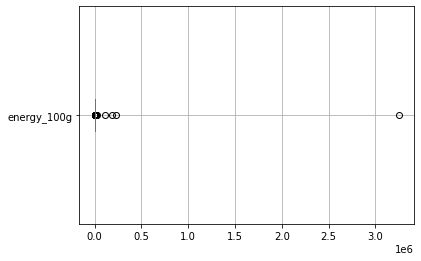

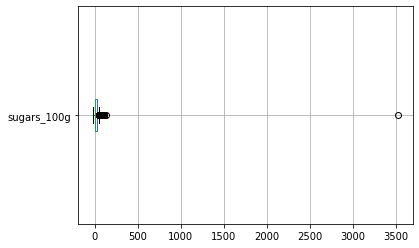

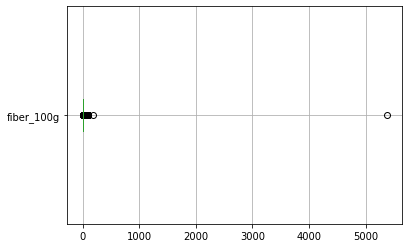

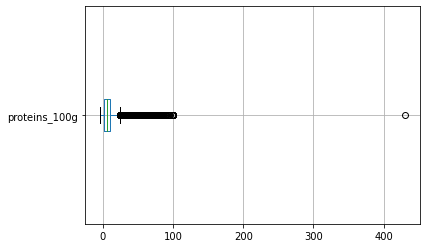

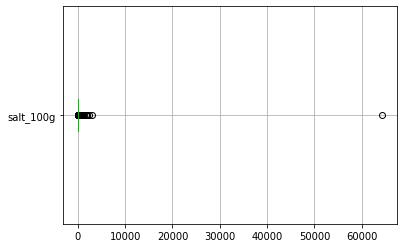

In [46]:
fig1 = df_OpenfoodfactsClean.boxplot( column= 'energy_100g', vert = False)
plt.show()

fig2 = df_OpenfoodfactsClean.boxplot( column= 'sugars_100g', vert = False)
plt.show()

fig3 = df_OpenfoodfactsClean.boxplot( column= 'fiber_100g', vert = False)
plt.show()

fig2 = df_OpenfoodfactsClean.boxplot( column= 'proteins_100g', vert = False)
plt.show()

fig2 = df_OpenfoodfactsClean.boxplot( column= 'salt_100g', vert = False)
plt.show()

**Traitement pour les protéines et sucre **

En poussant la recherche un peu plus loin on détermine les teneurs en surcre et en proteines des aliments où la valeur abérente a été noté et l'on répare cette erreur

In [47]:
# Traitement pour les protéines 
df_OpenfoodfactsClean['proteins_100g'] = df_OpenfoodfactsClean['proteins_100g'].abs()

#Traitement sur 'sugars_100g'
df_OpenfoodfactsClean.loc[df_OpenfoodfactsClean['sugars_100g'] < 0,['sugars_100g']]= [1.2,4,0,3.8,0,0.1]

In [48]:
#Traitement sur les valeurs dépassants la limite des 100g

df_OpenfoodfactsClean.loc[df_OpenfoodfactsClean['energy_100g'] > 1.713000e+03 , ['energy_100g']] = 1.713000e+03
df_OpenfoodfactsClean.loc[df_OpenfoodfactsClean['sugars_100g'] > 100 , ['sugars_100g']] = 100
df_OpenfoodfactsClean.loc[df_OpenfoodfactsClean['fiber_100g'] > 100 , ['fiber_100g']] = 100
df_OpenfoodfactsClean.loc[df_OpenfoodfactsClean['proteins_100g'] > 100 , ['proteins_100g']] = 100
df_OpenfoodfactsClean.loc[df_OpenfoodfactsClean['salt_100g'] > 100 , ['salt_100g']] = 100

#2. Export fichier cleané

In [49]:
df_OpenfoodfactsClean.to_csv('Freshfood_Data.csv', index = False)